#### Task: A supermarket has collected some customer basic data e.g. Customer ID, Age, Gender, Annual Income and Spending Score. Now, the supermarket wants to understand the customers like who can be easily converge to 'Target Customer' so that the sense can be given to marketing team and plan the strategry accordingly.

### Step 1: Import Library and Data

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [113]:
df=pd.read_csv('Mall_Customers.csv')

### Step 2: Exploring Data 

In [8]:
df.head(3)  # There are 5 features. 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [10]:
df.info() # There is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Step 3: Visualization

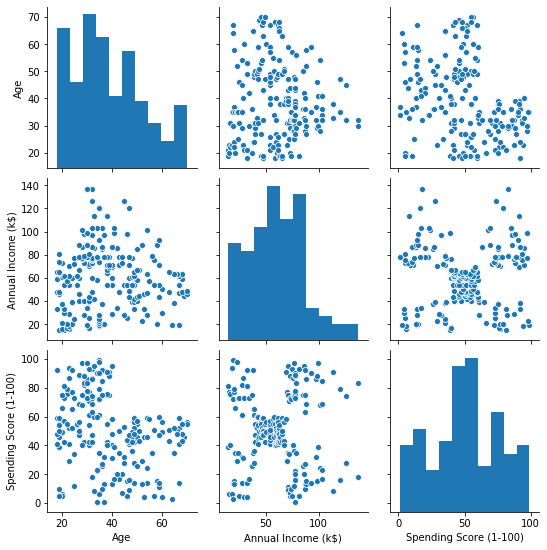

In [25]:
sns.pairplot(df.iloc[:,1:])

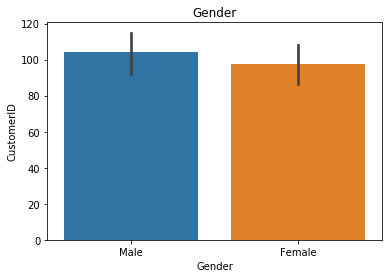

In [89]:
plt.title('Gender')
sns.barplot(x='Gender',y='CustomerID',data=df)

Text(0.5, 1.0, 'Relationship between Annual Income, Spending Score and Gender')

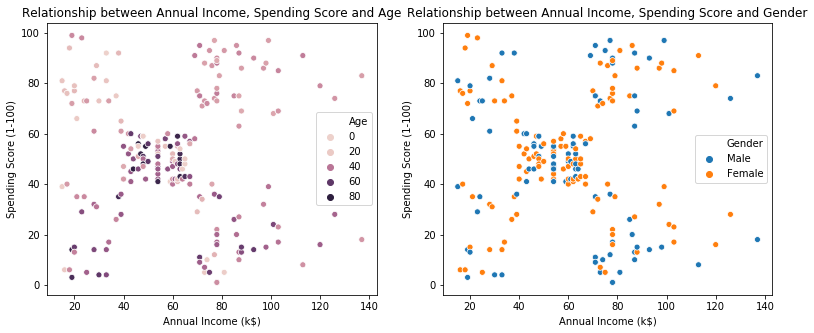

In [82]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(13,5))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Age',data=df,ax=ax1)
ax1.set_title("Relationship between Annual Income, Spending Score and Age")
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender',data=df,ax=ax2)
ax2.set_title("Relationship between Annual Income, Spending Score and Gender")

Text(0.5, 1.0, 'Relationship between Annual Income, Age and Gender')

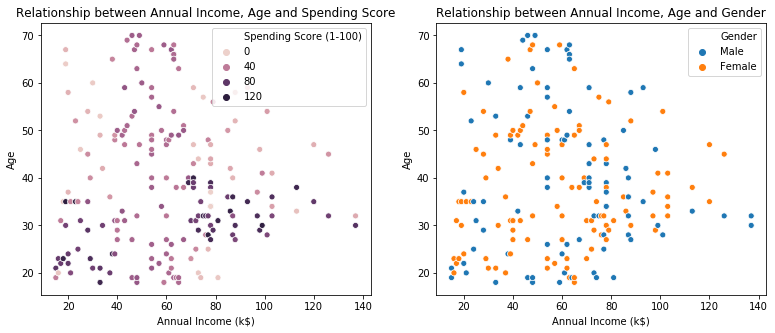

In [83]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(13,5))
sns.scatterplot(x='Annual Income (k$)',y='Age',hue='Spending Score (1-100)',data=df,ax=ax1)
ax1.set_title("Relationship between Annual Income, Age and Spending Score")
sns.scatterplot(x='Annual Income (k$)',y='Age',hue='Gender',data=df,ax=ax2)
ax2.set_title("Relationship between Annual Income, Age and Gender")

Text(0.5, 1.0, 'Relationship between Spending Score (1-100), Age and Gender')

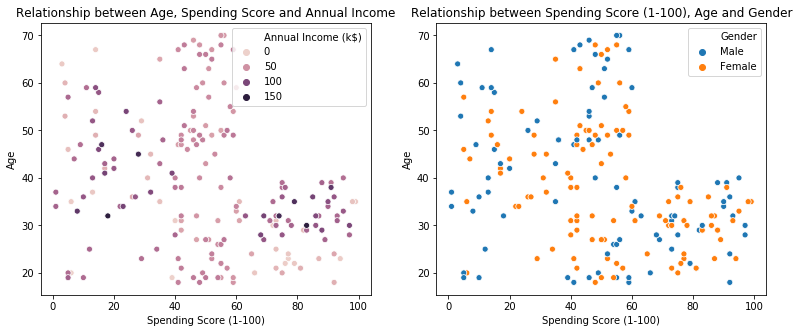

In [86]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(13,5))
sns.scatterplot(x='Spending Score (1-100)',y='Age',hue='Annual Income (k$)',data=df,ax=ax1)
ax1.set_title("Relationship between Age, Spending Score and Annual Income")
sns.scatterplot(x='Spending Score (1-100)',y='Age',hue='Gender',data=df,ax=ax2)
ax2.set_title("Relationship between Spending Score (1-100), Age and Gender")

### Step 4: Feature Engineering

In [115]:
df2=pd.concat([df,pd.get_dummies(df['Gender'])],axis=1)
df2=df2.drop(['CustomerID','Gender'],axis=1)

In [118]:
scaler = StandardScaler()
df3=scaler.fit_transform(df2)

### Step 5a: K-Means Clustering

In [209]:
WSS = []
K = range(1,10,2)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df2)
    WSS.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

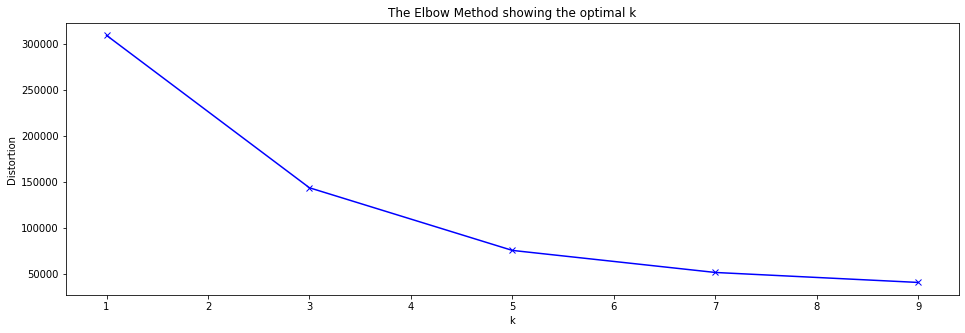

In [210]:
plt.figure(figsize=(16,5))
plt.plot(K, WSS, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow Method showing the optimal k')
#plt.show()

In [211]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [212]:
df['k_means']=kmeanModel.predict(df3)

In [213]:
output1a=pd.DataFrame(df3)
output1b=pd.DataFrame(kmeanModel.cluster_centers_)

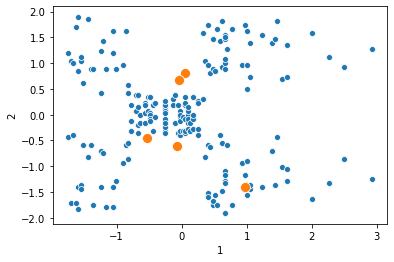

In [214]:
sns.scatterplot(x=output1a.iloc[:,1],y=output1a.iloc[:,2])
sns.scatterplot(x=output1b.iloc[:,1],y=output1b.iloc[:,2],s=100)

#### The result seems not good for clustering.

### Step 5b: K-Means Clustering (Remove Feature)
Based on Vistualization, we can usee that Gender does not correlated to other features, so, let's remove it.

In [256]:
df4=df2.drop(['Male','Female'],axis=1)

In [257]:
WSS = []
K = range(1,10,2)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df4)
    WSS.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

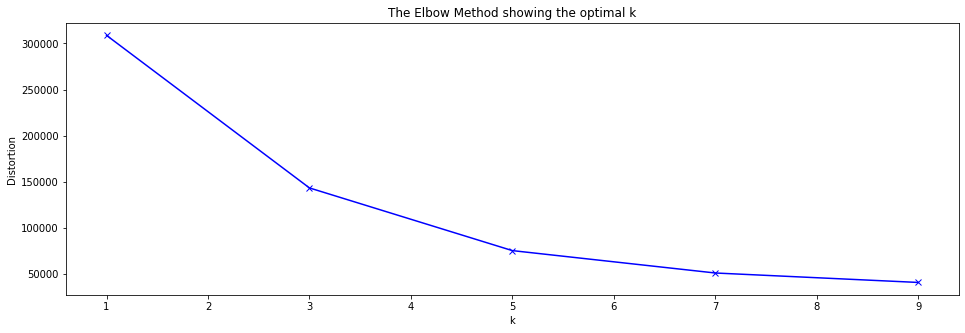

In [258]:
plt.figure(figsize=(16,5))
plt.plot(K, WSS, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow Method showing the optimal k')
#plt.show()

In [259]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df4)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [262]:
df['k_means']=kmeanModel.predict(df4)

In [263]:
output2a=pd.DataFrame(df4)
output2b=pd.DataFrame(kmeanModel.cluster_centers_)

Text(0, 0.5, 'Spending Score (1-100)')

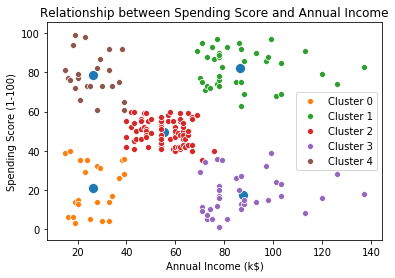

In [272]:
plt.title("Relationship between Spending Score and Annual Income")
sns.scatterplot(x=output2b.iloc[:,1],y=output2b.iloc[:,2],s=100,data=output2b)

sns.scatterplot(x=df[df['k_means']==0].loc[:,'Annual Income (k$)'],y=df[df['k_means']==0].loc[:,'Spending Score (1-100)'],data=df,label='Cluster 0')
sns.scatterplot(x=df[df['k_means']==1].loc[:,'Annual Income (k$)'],y=df[df['k_means']==1].loc[:,'Spending Score (1-100)'],data=df,label='Cluster 1')
sns.scatterplot(x=df[df['k_means']==2].loc[:,'Annual Income (k$)'],y=df[df['k_means']==2].loc[:,'Spending Score (1-100)'],data=df,label='Cluster 2')
sns.scatterplot(x=df[df['k_means']==3].loc[:,'Annual Income (k$)'],y=df[df['k_means']==3].loc[:,'Spending Score (1-100)'],data=df,label='Cluster 3')
sns.scatterplot(x=df[df['k_means']==4].loc[:,'Annual Income (k$)'],y=df[df['k_means']==4].loc[:,'Spending Score (1-100)'],data=df,label='Cluster 4')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

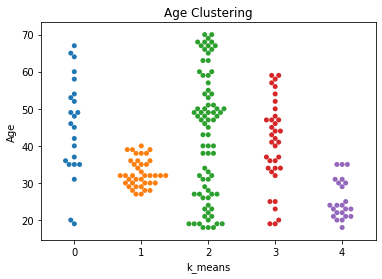

In [266]:
plt.title('Age Clustering')
sns.swarmplot(x=df['k_means'],
              y=df['Age'])

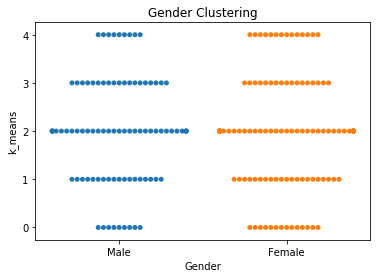

In [274]:
plt.title('Gender Clustering')
sns.swarmplot(y=df['k_means'],
              x=df['Gender'])

The result seems better than the first ones for Customer Segmentation.
So, let's have a look of each cluster:

In [267]:
df.groupby('k_means').agg({'Annual Income (k$)':['count','mean','min','max'],'Spending Score (1-100)':['mean','min','max'],'Age':['mean','min','max']})

Annual Income (k$)                     Spending Score (1-100)          \
                     count       mean min  max                   mean min max   
k_means                                                                         
0                       23  26.304348  15   39              20.913043   3  40   
1                       39  86.538462  69  137              82.128205  63  97   
2                       79  55.291139  40   76              49.569620  35  60   
3                       36  87.750000  70  137              17.583333   1  39   
4                       23  26.304348  15   39              78.565217  61  99   

               Age          
              mean min max  
k_means                     
0        45.217391  19  67  
1        32.692308  27  40  
2        43.088608  18  70  
3        40.666667  19  59  
4        25.521739  18  35

To sum up, based on K-Means Clustering, we obtain 5 segments:

Cluster 0: With low annual income and low spending score

Cluster 1: With high annual income and high spending score, their age are concentrate on 27-40

Cluster 2: With middle annual income and middle spending score

Cluster 3: With high annual income and low spending score

Cluster 4: With low anunal income and high spending score, their age are relatively lower